In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os
ROOT = '/content/drive/MyDrive/Self-Correction-Human-Parsing-Mirrored-Dirs-master'
os.chdir(ROOT)
print("Working directory:", os.getcwd())
!ls -la


Mounted at /content/drive
Working directory: /content/drive/MyDrive/Self-Correction-Human-Parsing-Mirrored-Dirs-master
total 261556
-rw------- 1 root root      4820 Sep  5 06:21 datasets.py
-rw------- 1 root root      4850 Sep  5 06:21 datasets.py.bak
-rw------- 1 root root      7280 Sep  5 06:17 evaluate.py
-rw------- 1 root root 267449349 Aug 25 09:49 exp-schp-201908261155-lip.pth
-rw------- 1 root root        25 Aug 28 07:15 .gitignore
-rw------- 1 root root    326621 Sep 11 08:13 humanparsingrun.ipynb
drwx------ 2 root root      4096 Aug 28 07:17 img
drwx------ 2 root root      4096 Aug 28 07:17 input
drwx------ 2 root root      4096 Sep  5 05:21 .ipynb_checkpoints
-rw------- 1 root root      1065 Aug 28 07:15 LICENSE
-rw------- 1 root root     10655 Sep  4 04:08 model.py
drwx------ 2 root root      4096 Aug 28 07:17 output
drwx------ 2 root root      4096 Sep  3 08:10 __pycache__
-rw------- 1 root root      4628 Aug 28 07:15 README.md


In [2]:
!pip install -q tqdm pillow opencv-python


In [3]:
import os
from PIL import Image

inp_dir = "input"
converted = []

for fname in os.listdir(inp_dir):
    if fname.lower().endswith((".jpg", ".jpeg")):
        base, _ = os.path.splitext(fname)
        new_name = base + ".png"
        in_path = os.path.join(inp_dir, fname)
        out_path = os.path.join(inp_dir, new_name)

        try:
            img = Image.open(in_path).convert("RGB")
            img.save(out_path)
            converted.append((fname, new_name))
            os.remove(in_path)  # remove old jpg
        except Exception as e:
            print("❌ Failed to convert", fname, ":", e)

print("✅ Converted files:", converted)
print("📂 Final input folder content:")
!ls -lh input


✅ Converted files: []
📂 Final input folder content:
total 7.3M
-rw------- 1 root root 1.9M Sep  5 06:21 demo.png
-rw------- 1 root root 559K Sep  5 06:21 file1.png
-rw------- 1 root root 790K Sep  5 06:21 file2.png
-rw------- 1 root root 487K Sep  5 06:21 file3.png
-rw------- 1 root root 884K Sep  5 06:21 file4.png
-rw------- 1 root root 117K Sep  5 06:21 file5.png
-rw------- 1 root root 102K Sep  5 06:26 file6.png
-rw------- 1 root root 2.5M Sep  5 06:26 file7.png


In [4]:
!python evaluate.py \
  --dataset lip \
  --restore-weight exp-schp-201908261155-lip.pth \
  --input input \
  --output output


DEBUG: Found 8 image(s) under input
Found 8 files
100% 8/8 [00:21<00:00,  2.72s/it]


✅ Parsed results: ['2240401523FS-1-38_5.png', 'c274c038bd9746e44ec52b4b764b6da6.png', 'demo.png', 'demo_atr.png', 'demo_lip.png', 'demo_pascal.png', 'ec85d1aa08a6194d31542066b2e270dc.png', 'file1.png', 'file2.png', 'file3.png', 'file4.png', 'file5.png', 'file6.png', 'file7.png', 'il_1080xN.4222637655_l2fm.png']


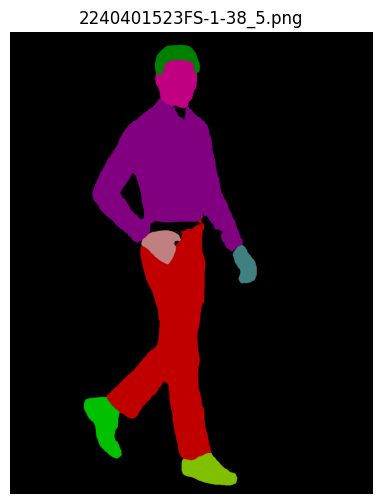

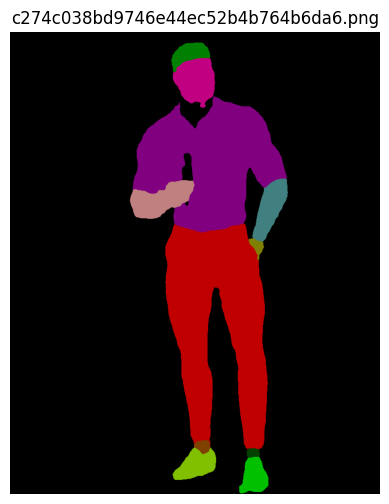

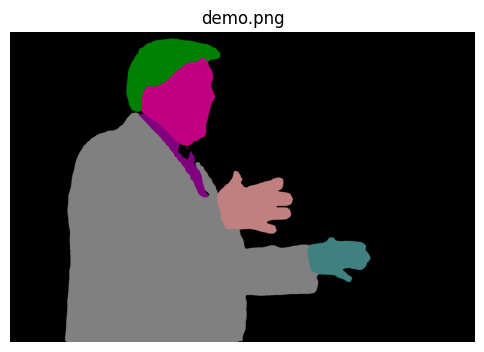

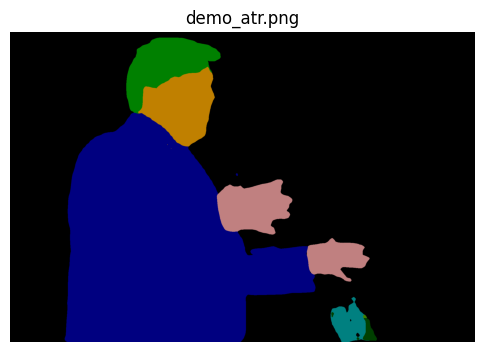

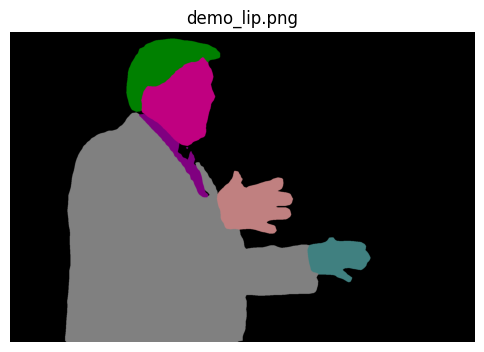

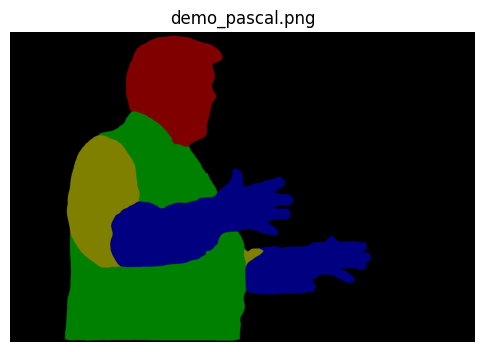

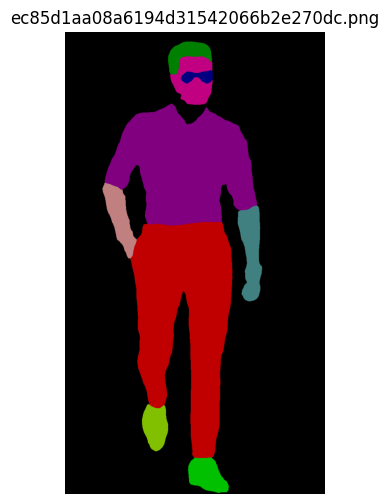

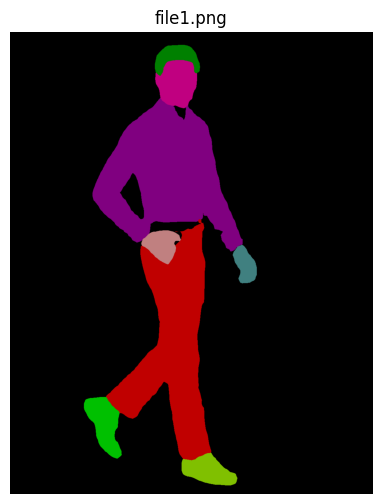

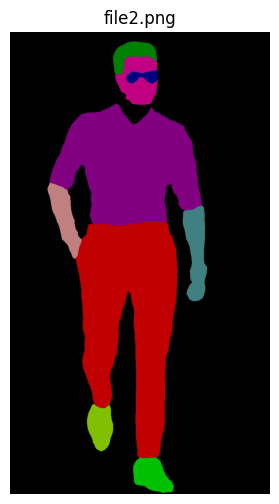

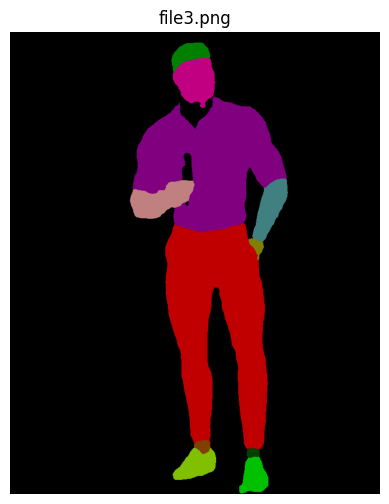

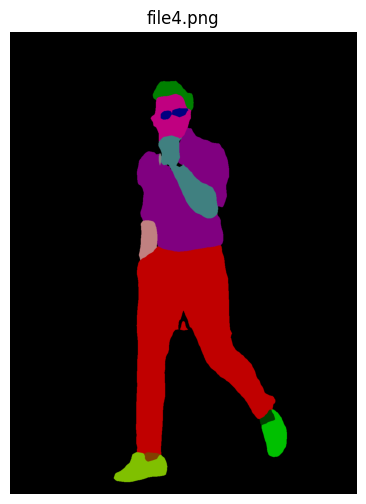

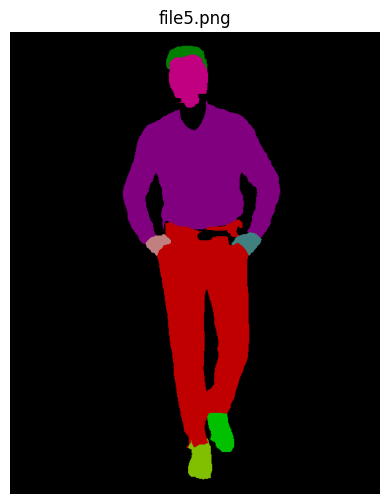

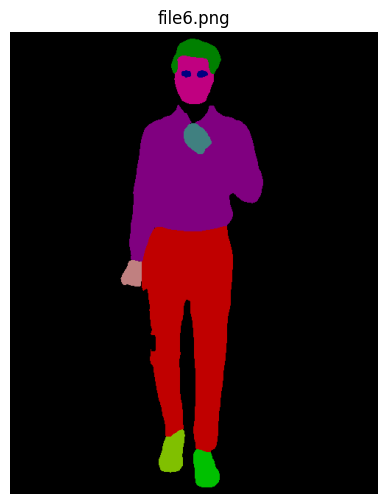

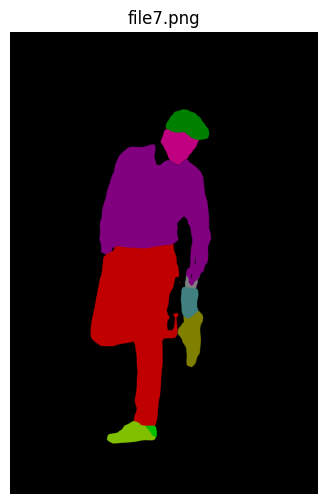

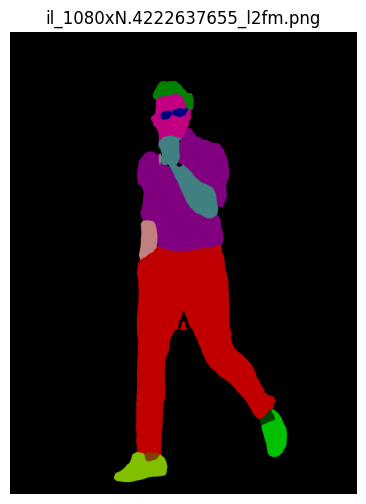

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

out_dir = "output"
files = sorted([f for f in os.listdir(out_dir) if f.endswith(".png")])

print("✅ Parsed results:", files)

for f in files:
    path = os.path.join(out_dir, f)
    mask = Image.open(path)
    plt.figure(figsize=(6,6))
    plt.title(f)
    plt.imshow(mask)
    plt.axis("off")
    plt.show()
